In [14]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)    
    A =(((C.T)/(C.sum(axis=1))).T)    
    B =(C/C.sum(axis=0))
    plt.figure(figsize=(20,4))
    
    labels = [0,1]
    # representing A in heatmap format
    cmap=sns.light_palette("green")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

In [15]:
import pandas as pd

df = pd.read_csv('crowd.csv')

In [18]:
from patsy import dmatrices
from sklearn.model_selection import train_test_split

col = df.columns.values.tolist()
col.remove('y')
#col.remove('month')

x = "+".join(col)
y, X = dmatrices('y ~' + x, df, return_type='dataframe')

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
y_test.y.value_counts()

0.0    1936
1.0     178
Name: y, dtype: int64

In [25]:
from sklearn.linear_model import LogisticRegressionCV

logistic_regression = LogisticRegressionCV(cv=2)
logistic_regression.fit(x_train, y_train)
predictions = logistic_regression.predict(x_test)
df1 = pd.DataFrame(predictions)
df1[0].value_counts()

C:\Users\adija\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.0    2059
1.0      55
Name: 0, dtype: int64

0.9361400189214759


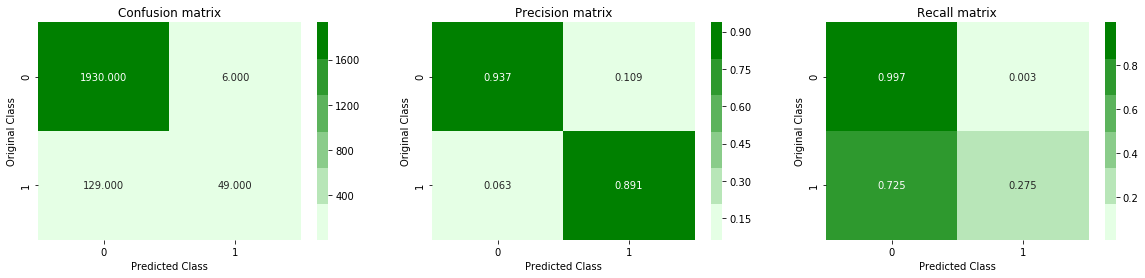

In [27]:
#print(logistic_regression.score(x_test, y_test))
print(accuracy_score(y_test, predictions)) 
plot_confusion_matrix(y_test, predictions) 

In [30]:
from sklearn.svm import SVC  
from sklearn.model_selection import cross_val_score

svclassifier = SVC(kernel='poly', degree=6) 
#svclassifier = SVC(kernel='rbf')
#svclassifier = SVC(kernel='sigmoid')  

svclassifier.fit(x_train, y_train) 
y_pred = svclassifier.predict(x_test) 
#scores = cross_val_score(svclassifier, x_train, y_train, cv=10)
#scores

C:\Users\adija\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0., 0., 0., ..., 0., 0., 0.])

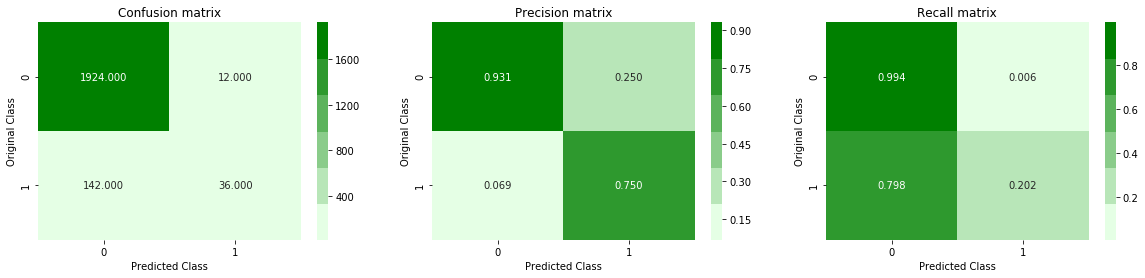

0.9271523178807947


In [31]:
print(accuracy_score(y_test, y_pred))  
plot_confusion_matrix(y_test, y_pred) 

In [32]:
from sklearn.ensemble import RandomForestClassifier
#from sklearn.datasets import make_classification
clf = RandomForestClassifier(n_estimators=300, criterion='entropy')
clf.fit(x_train, y_train)
#clf.feature_importances_

C:\Users\adija\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


array([0.        , 0.02144705, 0.09804743, 0.00597848, 0.00404991,
       0.0051416 , 0.01081713, 0.28832919, 0.17661624, 0.03518339,
       0.03316805, 0.04043932, 0.03232321, 0.03136897, 0.03425722,
       0.03533639, 0.04724009, 0.03212657, 0.03270939, 0.03542038])

0.9560075685903501


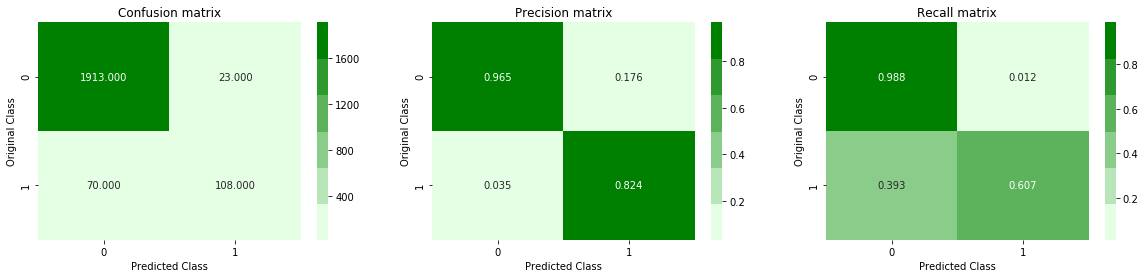

In [34]:
pred = clf.predict(x_test)
print(accuracy_score(y_test, pred))  
plot_confusion_matrix(y_test, pred) 

In [35]:
scores = cross_val_score(clf, x_train, y_train, cv=10)
scores

C:\Users\adija\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\adija\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\adija\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\adija\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y wa

array([0.9534413 , 0.94939271, 0.94726166, 0.93914807, 0.94929006,
       0.95334686, 0.93914807, 0.94320487, 0.95334686, 0.95131846])